In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)


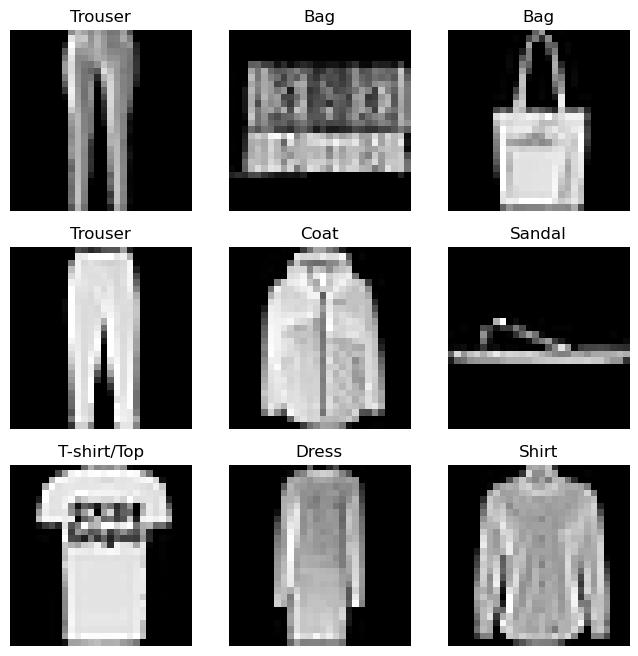

In [5]:
labels_map = {
    0: "T-shirt/Top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [7]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(7*7*64, 1000)
        self.fc2 = nn.Linear(1000, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [8]:
model = FashionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

total_step = len(train_loader)
num_epochs = 5

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/938], Loss: 0.4342
Epoch [1/5], Step [200/938], Loss: 0.6351
Epoch [1/5], Step [300/938], Loss: 0.4817
Epoch [1/5], Step [400/938], Loss: 0.4471
Epoch [1/5], Step [500/938], Loss: 0.3461
Epoch [1/5], Step [600/938], Loss: 0.3766
Epoch [1/5], Step [700/938], Loss: 0.3187
Epoch [1/5], Step [800/938], Loss: 0.3060
Epoch [1/5], Step [900/938], Loss: 0.3049
Epoch [2/5], Step [100/938], Loss: 0.1781
Epoch [2/5], Step [200/938], Loss: 0.3998
Epoch [2/5], Step [300/938], Loss: 0.3329
Epoch [2/5], Step [400/938], Loss: 0.5676
Epoch [2/5], Step [500/938], Loss: 0.2476
Epoch [2/5], Step [600/938], Loss: 0.2092
Epoch [2/5], Step [700/938], Loss: 0.3376
Epoch [2/5], Step [800/938], Loss: 0.3020
Epoch [2/5], Step [900/938], Loss: 0.3622
Epoch [3/5], Step [100/938], Loss: 0.2247
Epoch [3/5], Step [200/938], Loss: 0.3085
Epoch [3/5], Step [300/938], Loss: 0.3880
Epoch [3/5], Step [400/938], Loss: 0.3572
Epoch [3/5], Step [500/938], Loss: 0.2583
Epoch [3/5], Step [600/938], Loss:

In [9]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 91.2 %
